# 📖 Resources:
## For Random Forest
- https://machinelearningmastery.com/bagging-and-random-forest-for-imbalanced-classification/
- https://medium.com/sfu-cspmp/surviving-in-a-random-forest-with-imbalanced-datasets-b98b963d52eb
- https://stats.stackexchange.com/questions/242833/is-random-forest-a-good-option-for-unbalanced-data-classification

## For XGBoost
- https://forecastegy.com/posts/xgboost-imbalanced-data-scale_pos_weight-python/
- https://machinelearningmastery.com/xgboost-for-imbalanced-classification/
-

# 🔽 Installing & Importing

In [ ]:
!pip install graphtools

In [ ]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from statistics import mean
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import graphtools as gt # for DBCV metric
from xgboost import XGBClassifier
from collections import Counter


# 🗻 Mounting Google

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/DataMining-Prj4/"

# 📝 Read CSV File

In [ ]:
df = pd.read_csv(path + 'Dataset.csv')

In [ ]:
# Separate the features and the label
X = df.iloc[:, 1:-1] # all columns except the first and the last
y = df.iloc[:, -1] # the last column

# ⛅ Pre-processing

In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features to a DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Optionally, you can concatenate the scaled features with the label
df_scaled = pd.concat([X_scaled_df, y], axis=1)

In [ ]:
df_scaled

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81,Class Label
0,1.890394,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.377566,-0.329883,0.270676,0.240670,...,0.210221,1.050469,1.374710,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644636,0
1,0.276236,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,-0.329883,-0.214907,1.014424,...,0.043259,0.102175,-0.293301,0.668268,-0.034002,-0.878345,-0.160573,-0.495036,-0.438186,0
2,-0.414624,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.683473,-0.329883,-0.603372,-0.533084,...,-0.282715,-0.378130,-0.501803,-0.296158,-0.034003,-0.878345,-0.473329,-0.542862,-0.438186,0
3,-0.411396,-0.073243,0.034108,0.083643,-0.026884,-0.220402,-0.607684,-0.329883,-0.506256,-0.533084,...,1.665176,3.033266,-0.501803,-0.296158,-0.034003,-0.878345,-0.719066,-1.068951,-0.706258,0
4,-0.366199,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.228742,-0.329883,-0.506256,0.756506,...,-0.266814,-0.378130,-0.501803,-0.296158,-0.034003,0.157306,-0.596198,-0.542862,-0.572222,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,-0.104706,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.304530,-0.329883,-0.506256,0.240670,...,-0.179357,-0.230344,-0.501803,-0.296158,-0.034003,0.157306,-0.541590,-0.542862,-0.438186,0
298170,-0.375884,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,1.625557,0.270676,-0.533084,...,-0.258863,-0.365814,-0.501803,-0.296158,-0.034003,-0.878345,0.018145,-0.542862,-0.304151,0
298171,-0.069194,0.030225,-0.373516,-0.469795,-0.388578,-0.220402,-0.456107,-0.329883,-0.506256,-0.275166,...,-0.052148,-0.094873,-0.501803,-0.296158,-0.034003,1.192957,-0.511135,-0.542862,-0.572222,0
298172,-0.111162,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.607684,-0.329883,-0.603372,-0.533084,...,0.027358,-0.045611,-0.501803,-0.296158,-0.034003,0.157306,-0.489712,-0.542862,-0.036079,0


In [ ]:
# Separate the features and the label
X_scaled = df_scaled.iloc[:, :-1] # all columns except the first and the last
y_scaled = df_scaled.iloc[:, -1] # the last column

In [ ]:
X_scaled

,FEATURE1,FEATURE2,FEATURE3,FEATURE4,FEATURE5,FEATURE6,FEATURE7,FEATURE8,FEATURE9,FEATURE10,...,FEATURE72,FEATURE73,FEATURE74,FEATURE75,FEATURE76,FEATURE77,FEATURE78,FEATURE79,FEATURE80,FEATURE81
0,1.890394,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.377566,-0.329883,0.270676,0.240670,...,1.992453,0.210221,1.050469,1.374710,-0.296158,-0.034001,0.157306,0.155906,-0.064600,2.644636
1,0.276236,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,-0.329883,-0.214907,1.014424,...,0.923139,0.043259,0.102175,-0.293301,0.668268,-0.034002,-0.878345,-0.160573,-0.495036,-0.438186
2,-0.414624,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.683473,-0.329883,-0.603372,-0.533084,...,-1.261303,-0.282715,-0.378130,-0.501803,-0.296158,-0.034003,-0.878345,-0.473329,-0.542862,-0.438186
3,-0.411396,-0.073243,0.034108,0.083643,-0.026884,-0.220402,-0.607684,-0.329883,-0.506256,-0.533084,...,-1.870637,1.665176,3.033266,-0.501803,-0.296158,-0.034003,-0.878345,-0.719066,-1.068951,-0.706258
4,-0.366199,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.228742,-0.329883,-0.506256,0.756506,...,-1.261303,-0.266814,-0.378130,-0.501803,-0.296158,-0.034003,0.157306,-0.596198,-0.542862,-0.572222
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298169,-0.104706,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.304530,-0.329883,-0.506256,0.240670,...,0.237314,-0.179357,-0.230344,-0.501803,-0.296158,-0.034003,0.157306,-0.541590,-0.542862,-0.438186
298170,-0.375884,-0.073243,0.034108,0.083643,-0.026884,-0.220402,0.225989,1.625557,0.270676,-0.533084,...,-0.904865,-0.258863,-0.365814,-0.501803,-0.296158,-0.034003,-0.878345,0.018145,-0.542862,-0.304151
298171,-0.069194,0.030225,-0.373516,-0.469795,-0.388578,-0.220402,-0.456107,-0.329883,-0.506256,-0.275166,...,0.449316,-0.052148,-0.094873,-0.501803,-0.296158,-0.034003,1.192957,-0.511135,-0.542862,-0.572222
298172,-0.111162,-0.073243,-0.373516,-0.469795,-0.388578,-0.220402,-0.607684,-0.329883,-0.603372,-0.533084,...,0.566701,0.027358,-0.045611,-0.501803,-0.296158,-0.034003,0.157306,-0.489712,-0.542862,-0.036079


In [ ]:
y_scaled

0         0
1         0
2         0
3         0
4         0
         ..
298169    0
298170    0
298171    0
298172    0
298173    0
Name: Class Label, Length: 298174, dtype: int64

# 🌴🌳🌲 Random Forest

## Standard Random Forest

In [ ]:
#Build SRF model
SRF = RandomForestClassifier(n_estimators=150, random_state=0)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')
#Evaluate SRF model
scores = cross_validate(SRF, X_scaled, y_scaled, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.1, stratify=y)
#Train SRF
SRF.fit(X_train, y_train)
#SRF prediction result
y_pred = SRF.predict(X_test)


Mean f1: 0.938
Mean recall: 0.922
Mean precision: 0.955


TypeError: confusion_matrix() got an unexpected keyword argument 'display_labels'

In [ ]:
y_pred_proba = SRF.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

AUC: 1.0


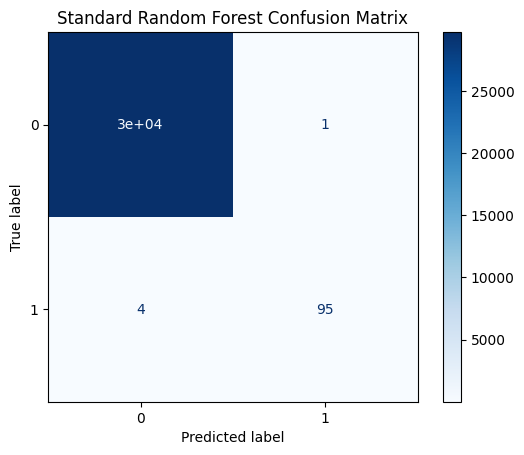

In [ ]:
#Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap="Blues")
plt.title('Standard Random Forest Confusion Matrix')
plt.show()

## Balanced Random Forest

In [ ]:
#Build SRF model
BRFC = BalancedRandomForestClassifier(n_estimators=150, random_state=2)
#Create Stratified K-fold cross validation
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scoring = ('f1', 'recall', 'precision')
#Evaluate BRFC model
scores = cross_validate(BRFC, X_scaled, y, scoring=scoring, cv=cv)
#Get average evaluation metrics
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, stratify=y)
#Train BRFC
BRFC.fit(X_train, y_train)
#BRFC prediction result
y_pred = BRFC.predict(X_test)


In [ ]:
print('Mean f1: %.3f' % mean(scores['test_f1']))
print('Mean recall: %.3f' % mean(scores['test_recall']))
print('Mean precision: %.3f' % mean(scores['test_precision']))

Mean f1: 0.386
Mean recall: 0.999
Mean precision: 0.239


In [ ]:
y_pred_proba = BRFC.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

AUC: 0.9997698985888358


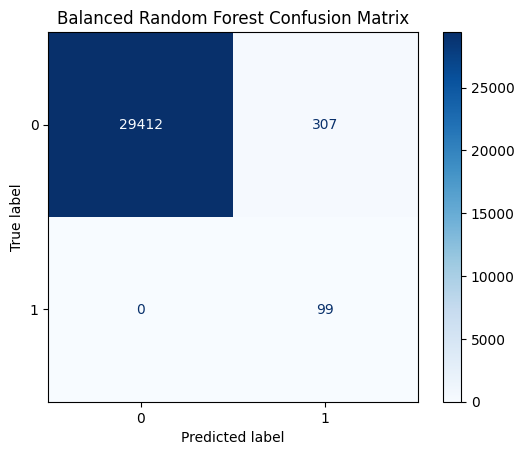

In [ ]:
#Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap="Blues")
plt.title('Balanced Random Forest Confusion Matrix')
plt.show()

## SMOTE (Synthetic Minority Oversampling Technique) using Standard Random Forest
This solution takes more than 4 hours, and because of my own time limitation I had to interrupt the process.

In [ ]:
#Use SMOTE to oversample the minority class
oversample = SMOTE()
over_X, over_y = oversample.fit_resample(X_scaled, y)
over_X_train, over_X_test, over_y_train, over_y_test = train_test_split(over_X, over_y, test_size=0.1, stratify=over_y)
#Build SMOTE SRF model
SMOTE_SRF = RandomForestClassifier(n_estimators=150, random_state=0)

#Randomly spilt dataset to test and train set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.1, stratify=y)
#Train SMOTE SRF
SMOTE_SRF.fit(over_X_train, over_y_train)
#SMOTE SRF prediction result
y_pred = SMOTE_SRF.predict(X_test)

# evaluate the random forest classifier using various metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1: {f1_score(y_test, y_pred):.3f}")
print(f"Confusion matrix: \n{confusion_matrix(y_test, y_pred)}")

Accuracy: 1.000
Precision: 0.990
Recall: 0.990
F1: 0.990
Confusion matrix: 
[[29718     1]
 [    1    98]]


In [ ]:
y_pred_proba = SMOTE_SRF.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

AUC: 0.9999972809286716


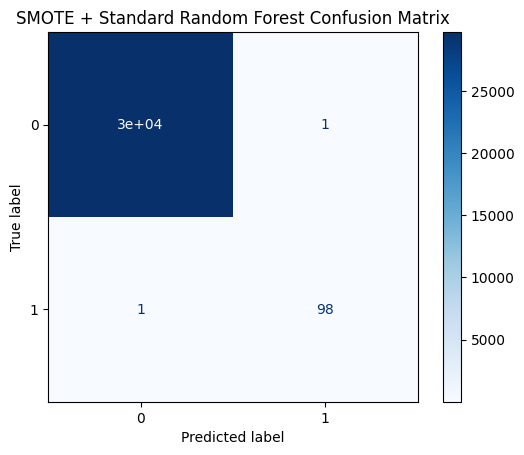

In [ ]:
#Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap="Blues")
plt.title('SMOTE + Standard Random Forest Confusion Matrix')
plt.show()

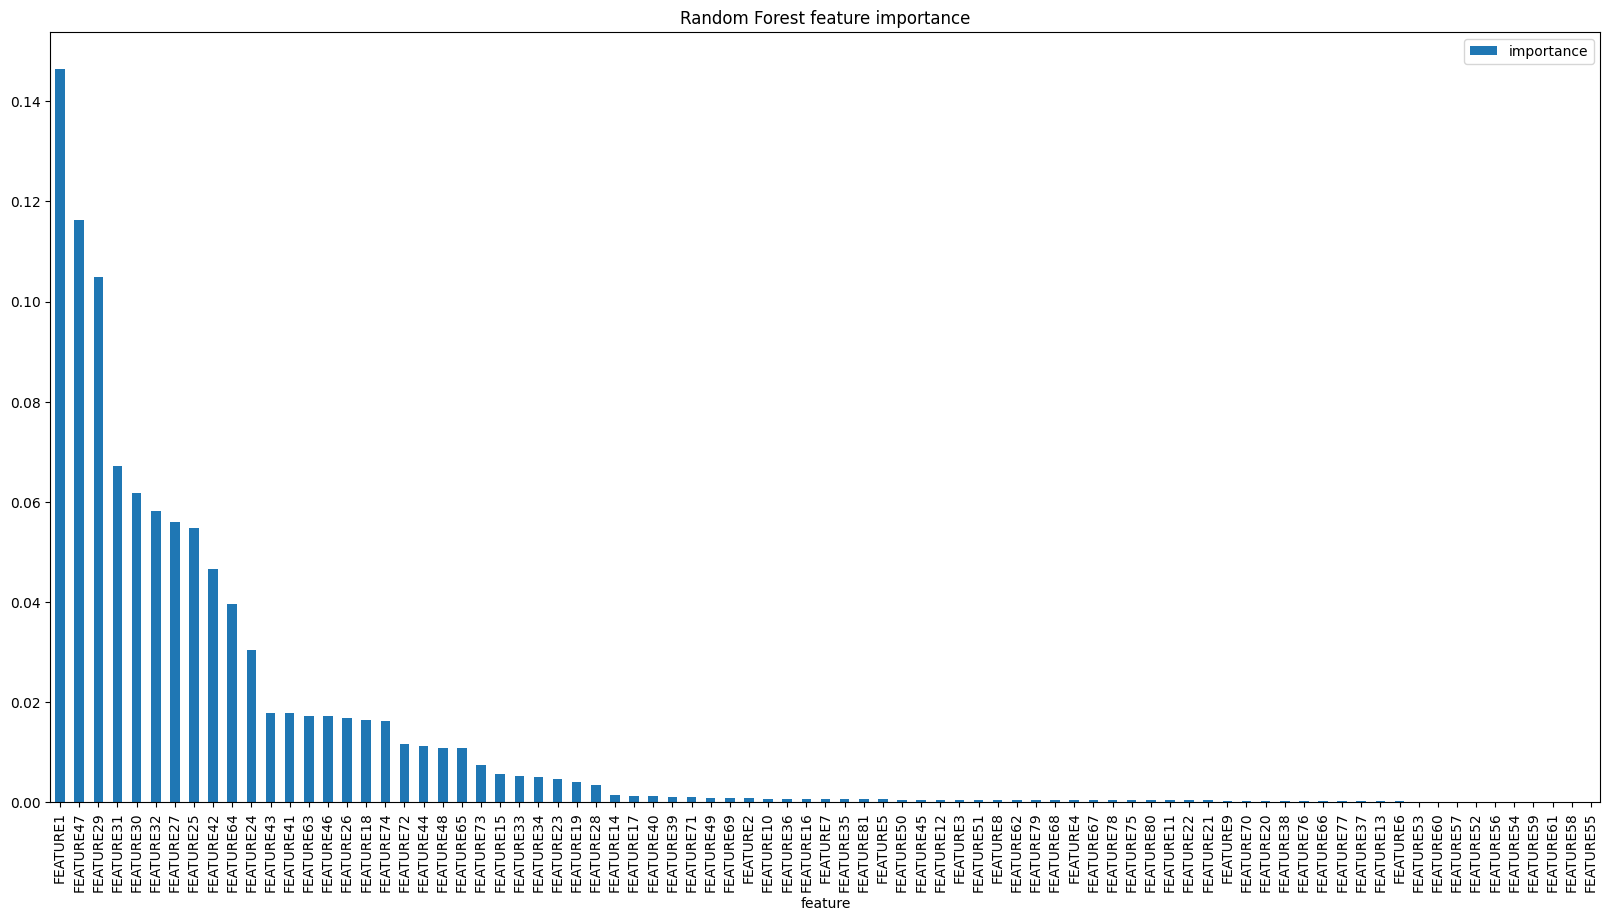

In [ ]:
# get the feature importance from the Random Forest model
rf_importance = SMOTE_SRF.feature_importances_

# sort the features by importance in descending order for the Random Forest model
rf_sorted_features = sorted(zip(features, rf_importance), key=lambda x: x[1], reverse=True)

# create a data frame of the feature importance for the Random Forest model
rf_df = pd.DataFrame(rf_sorted_features, columns=["feature", "importance"])

# plot the feature importance for the Random Forest model
rf_df.plot(kind="bar", x="feature", y="importance", title="Random Forest feature importance", figsize=(20,10))
plt.show()

# 👻 XGBoost

## Standard XGBoost

In [ ]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=0, stratify=y)

# create XGBClassifier object with desired parameters
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=0)

# fit XGBClassifier to training set
xgb.fit(X_train, y_train)

# predict on testing set
y_pred = xgb.predict(X_test)

# evaluate the model using various metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1: {f1_score(y_test, y_pred):.3f}")
print(f"Confusion matrix: \n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.999
Precision: 0.926
Recall: 0.845
F1: 0.884
Confusion matrix: 
[[89136    20]
 [   46   251]]


In [ ]:
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

AUC: 0.9938411399502074


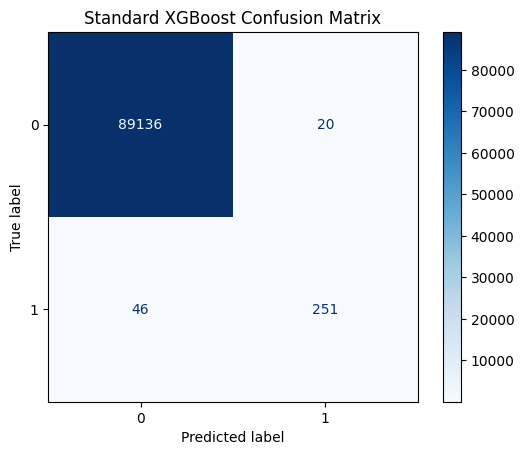

In [ ]:
#Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap="Blues")
plt.title('Standard XGBoost Confusion Matrix')
plt.show()

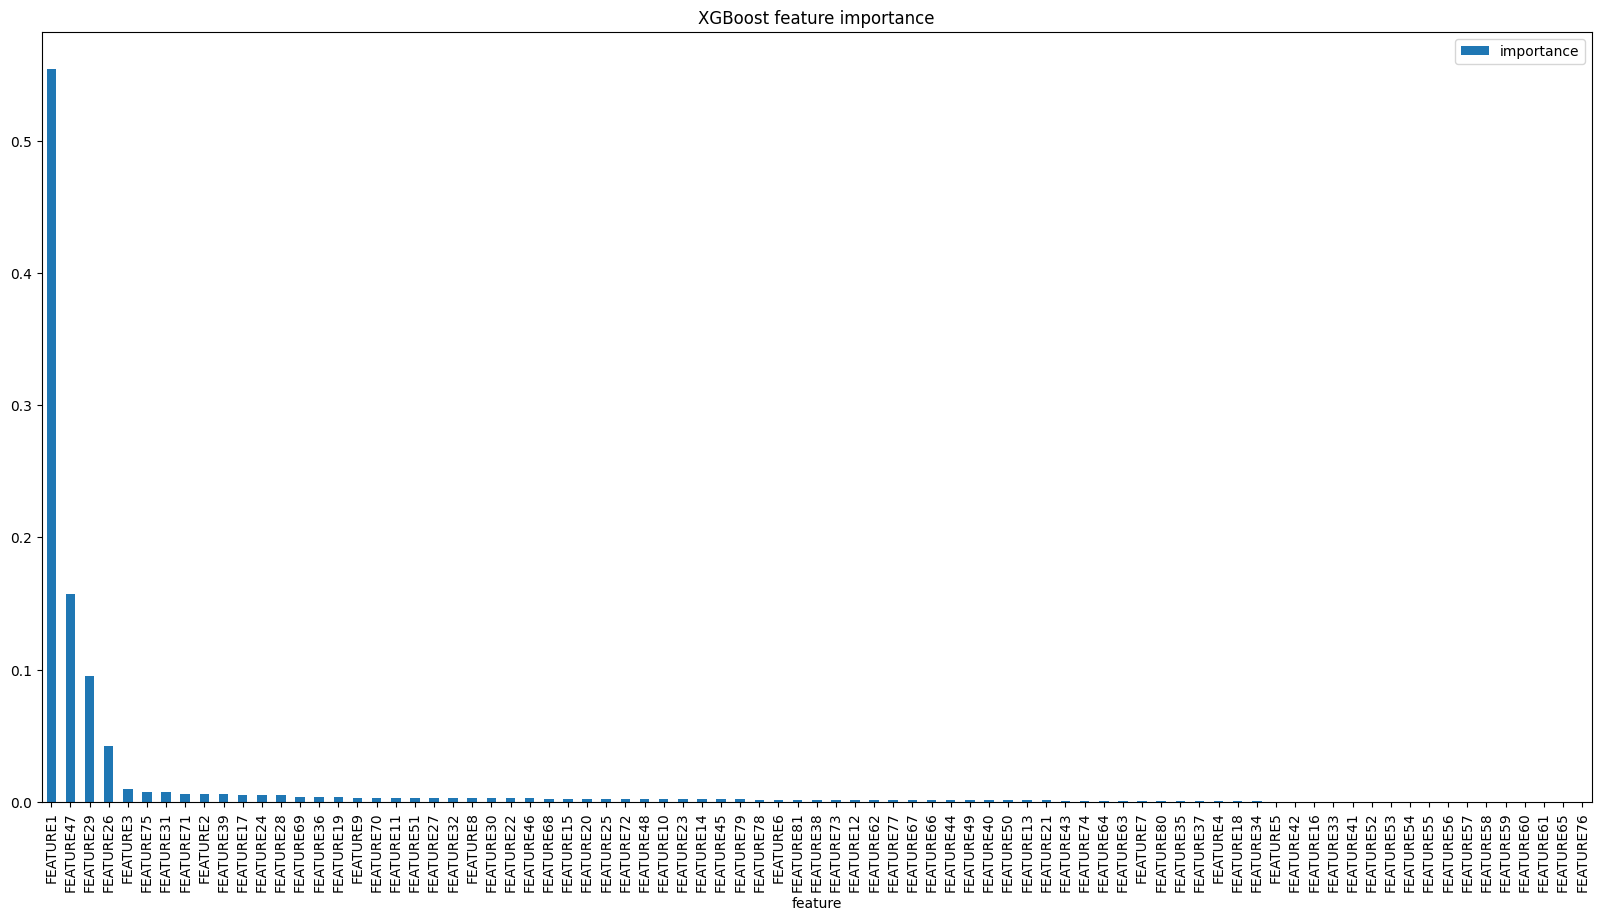

In [ ]:
features = X.columns

# get the feature importance from the XGBoost model
xgb_importance = xgb.feature_importances_

# sort the features by importance in descending order for the XGBoost model
xgb_sorted_features = sorted(zip(features, xgb_importance), key=lambda x: x[1], reverse=True)

# create a data frame of the feature importance for the XGBoost model
xgb_df = pd.DataFrame(xgb_sorted_features, columns=["feature", "importance"])

# plot the feature importance for the XGBoost model
xgb_df.plot(kind="bar", x="feature", y="importance", title="XGBoost feature importance", figsize=(20,10))
plt.show()


## Weighted XGBoost

In [ ]:
# split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# calculate the scale_pos_weight value
counter = Counter(y_train)
ratio = counter[0] / counter[1]
# alternatively, use a heuristic value
# ratio = np.sqrt(counter[0] / counter[1])

# create XGBClassifier object with desired parameters
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, scale_pos_weight=ratio)

# fit XGBClassifier to training set
xgb.fit(X_train, y_train)

# predict on testing set
y_pred = xgb.predict(X_test)

# evaluate the model using various metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1: {f1_score(y_test, y_pred):.3f}")
print(f"Confusion matrix: \n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.997
Precision: 0.494
Recall: 0.970
F1: 0.655
Confusion matrix: 
[[88861   295]
 [    9   288]]


In [ ]:
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

AUC: 0.9993628804533286


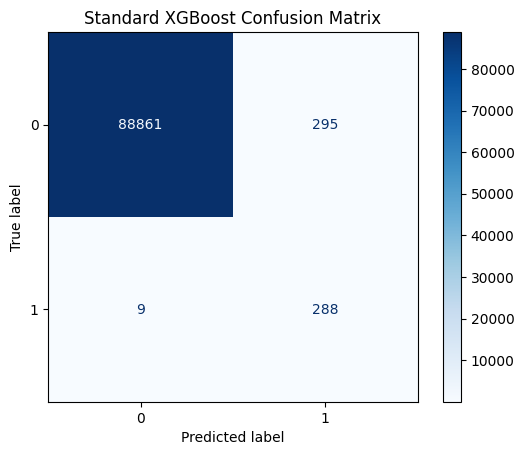

In [ ]:
#Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap="Blues")
plt.title('Standard XGBoost Confusion Matrix')
plt.show()

## XGBoost with SMOTE

In [ ]:
# apply SMOTE to the training set
sm = SMOTE()
X_train_sm, y_train_sm = sm.fit_resample(X_scaled, y)

# create XGBClassifier object with desired parameters
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# fit XGBClassifier to the oversampled training set
xgb.fit(X_train_sm, y_train_sm)

# predict on the testing set
y_pred = xgb.predict(X_test)

# evaluate the model using various metrics
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1: {f1_score(y_test, y_pred):.3f}")
print(f"Confusion matrix: \n{confusion_matrix(y_test, y_pred)}")

Accuracy: 0.997
Precision: 0.518
Recall: 0.993
F1: 0.681
Confusion matrix: 
[[88882   274]
 [    2   295]]


In [ ]:
y_pred_proba = xgb.predict_proba(X_test)[:, 1]

# Calculate AUC
auc = roc_auc_score(y_test, y_pred_proba)
print(f"AUC: {auc}")

AUC: 0.9998062073469226


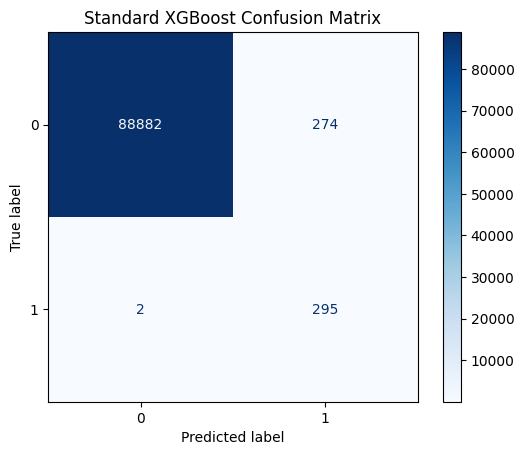

In [ ]:
#Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp = disp.plot(cmap="Blues")
plt.title('Standard XGBoost Confusion Matrix')
plt.show()